In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plts
import seaborn as snr
import datetime as dt

In [ ]:
data=pd.read_csv('/content/Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
data.shape

(768, 7)

In [ ]:
#missing values calumns wise
data.isnull().sum(axis=0).sort_values()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
#missing values row wise
data.isnull().sum(axis=1).sort_values()

,0
0,0
499,0
500,0
501,0
502,0
...,...
361,7
360,7
359,7
372,7


In [ ]:
# total no of NAN values in dataset
data.isnull().sum().sum()

196

In [ ]:
data.isnull().mean()*100

,0
Region,3.645833
Date,3.645833
Frequency,3.645833
Estimated Unemployment Rate (%),3.645833
Estimated Employed,3.645833
Estimated Labour Participation Rate (%),3.645833
Area,3.645833


In [ ]:
# we use forward data for removing Nan value data
new_data=data.fillna(method='ffill')
new_data

<ipython-input-9-fd3587de51d1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data=data.fillna(method='ffill')


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
764,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
765,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban
766,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [ ]:
new_data.isnull().sum(axis=0).sort_values()# we can check the data having Nan data

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    768 non-null    object 
 1    Date                                     768 non-null    object 
 2    Frequency                                768 non-null    object 
 3    Estimated Unemployment Rate (%)          768 non-null    float64
 4    Estimated Employed                       768 non-null    float64
 5    Estimated Labour Participation Rate (%)  768 non-null    float64
 6   Area                                      768 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# we convert the categorical data into numerical data
my_data=pd.get_dummies(new_data,columns=['Region','Area'],drop_first=True) # Changed new_data to data
my_data.head()

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,...,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban
0,31-05-2019,Monthly,3.65,11999139.0,43.24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,30-06-2019,Monthly,3.05,11755881.0,42.05,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,31-07-2019,Monthly,3.75,12086707.0,43.50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,31-08-2019,Monthly,3.32,12285693.0,43.97,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,30-09-2019,Monthly,5.17,12256762.0,44.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0    Date                                     768 non-null    object 
 1    Frequency                                768 non-null    object 
 2    Estimated Unemployment Rate (%)          768 non-null    float64
 3    Estimated Employed                       768 non-null    float64
 4    Estimated Labour Participation Rate (%)  768 non-null    float64
 5   Region_Assam                              768 non-null    bool   
 6   Region_Bihar                              768 non-null    bool   
 7   Region_Chandigarh                         768 non-null    bool   
 8   Region_Chhattisgarh                       768 non-null    bool   
 9   Region_Delhi                              768 non-null    bool   
 10  Region_Goa                            

#display the correction matrix by using heatmap

In [ ]:
my_data[' Frequency']=my_data[' Frequency'].apply({'Monthly':0}.get)

my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0    Date                                     768 non-null    object 
 1    Frequency                                395 non-null    float64
 2    Estimated Unemployment Rate (%)          768 non-null    float64
 3    Estimated Employed                       768 non-null    float64
 4    Estimated Labour Participation Rate (%)  768 non-null    float64
 5   Region_Assam                              768 non-null    bool   
 6   Region_Bihar                              768 non-null    bool   
 7   Region_Chandigarh                         768 non-null    bool   
 8   Region_Chhattisgarh                       768 non-null    bool   
 9   Region_Delhi                              768 non-null    bool   
 10  Region_Goa                            

#convert date to datetime formate

In [ ]:
my_data[' Date']=pd.to_datetime(my_data[' Date'])
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0    Date                                     768 non-null    datetime64[ns]
 1    Frequency                                395 non-null    float64       
 2    Estimated Unemployment Rate (%)          768 non-null    float64       
 3    Estimated Employed                       768 non-null    float64       
 4    Estimated Labour Participation Rate (%)  768 non-null    float64       
 5   Region_Assam                              768 non-null    bool          
 6   Region_Bihar                              768 non-null    bool          
 7   Region_Chandigarh                         768 non-null    bool          
 8   Region_Chhattisgarh                       768 non-null    bool          
 9   Region_Delhi                    

<ipython-input-64-001adb16aad8>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  my_data[' Date']=pd.to_datetime(my_data[' Date'])


In [ ]:
my_data.head()

,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_Assam,Region_Bihar,Region_Chandigarh,Region_Chhattisgarh,Region_Delhi,...,Region_Punjab,Region_Rajasthan,Region_Sikkim,Region_Tamil Nadu,Region_Telangana,Region_Tripura,Region_Uttar Pradesh,Region_Uttarakhand,Region_West Bengal,Area_Urban
0,2019-05-31,NaN,3.65,11999139.0,43.24,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019-06-30,NaN,3.05,11755881.0,42.05,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2019-07-31,NaN,3.75,12086707.0,43.50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-08-31,NaN,3.32,12285693.0,43.97,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019-09-30,NaN,5.17,12256762.0,44.68,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

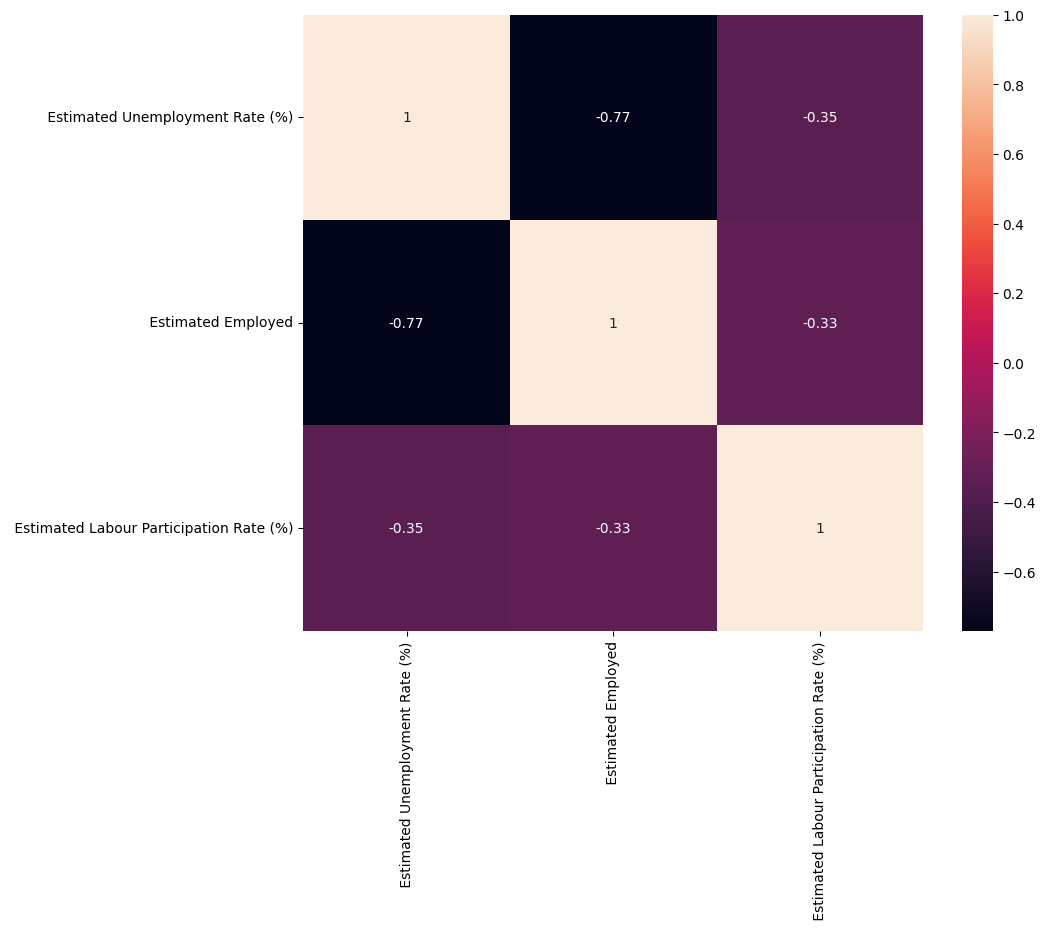

In [ ]:
df=data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
snr.heatmap(df.corr(),annot=True)

# we visualization on categorical data

<Axes: xlabel='Region', ylabel='count'>

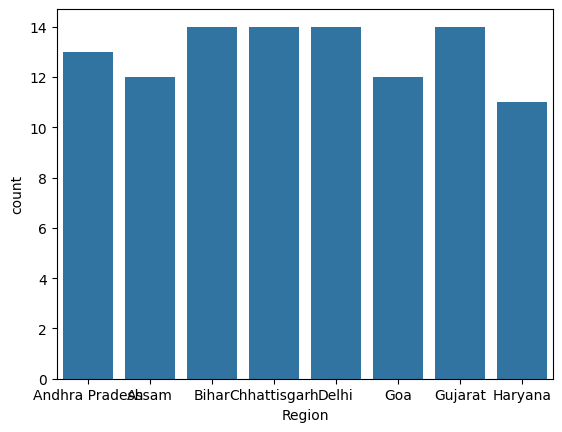

In [ ]:
snr.countplot(x='Region',data=data.iloc[1:105])

<Axes: xlabel='Region', ylabel='count'>

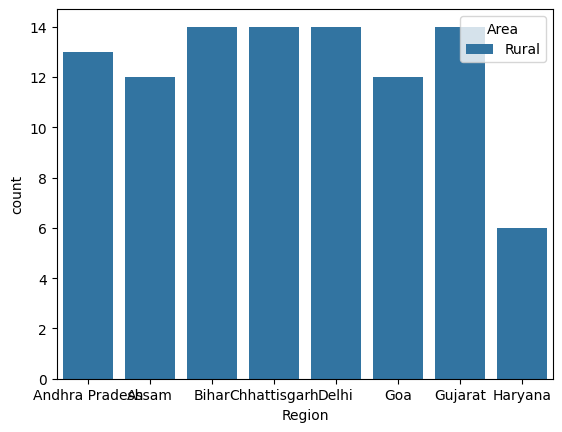

In [ ]:
snr.countplot(data=new_data.iloc[1:100], x="Region",hue='Area')

we analysis the data on numerical value

<Axes: >

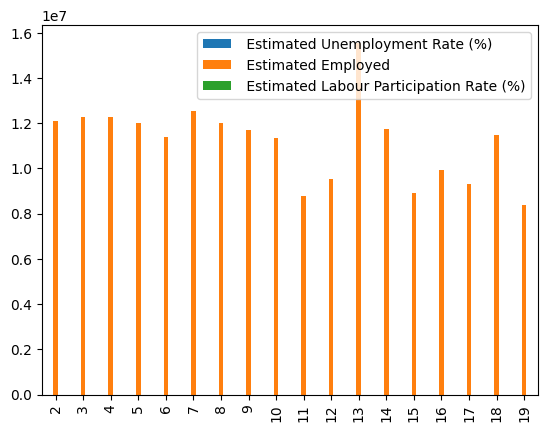

In [ ]:
new_data.iloc[2:20].plot(kind='bar')

<Axes: ylabel='Frequency'>

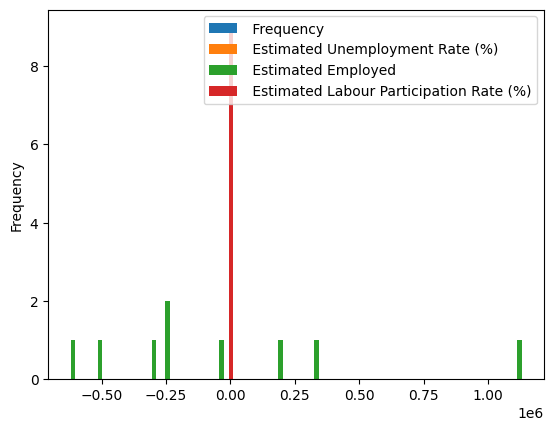

In [ ]:
my_data.iloc[0:10].diff().plot(kind='hist',bins=100)